In [3]:
import warnings
warnings.filterwarnings("ignore")

# Check Dataset

In [ ]:
from pathlib import Path
from PIL import Image
import random

# default: lokal
DATA_DIR = Path("brain-tumor-mri-dataset")

# override otomatis kalau di Kaggle
kaggle_dir = Path("/kaggle/input/brain-tumor-mri-dataset")
if kaggle_dir.exists():
    DATA_DIR = kaggle_dir

TRAIN = DATA_DIR/"Training"
TEST  = DATA_DIR/"Testing"
EXTS = {".jpg",".jpeg",".png",".bmp",".tif",".tiff",".webp"}

def classes(d): return sorted([x.name for x in d.iterdir() if x.is_dir()])
def count_per_class(d):
    return {c: sum(1 for p in (d/c).rglob("*") if p.suffix.lower() in EXTS) for c in classes(d)}

print("Classes train:", classes(TRAIN))
print("Classes test :", classes(TEST))
print("\nCounts train:", count_per_class(TRAIN))
print("Counts test :", count_per_class(TEST))

# sample 1 gambar untuk cek size & mode (RGB / L)
def sample_img_info(d):
    imgs = [p for p in d.rglob("*") if p.suffix.lower() in EXTS]
    p = random.choice(imgs)
    with Image.open(p) as im:
        print(f"\nSample {d.name}: {p.name} | size={im.size} | mode={im.mode}")

sample_img_info(TRAIN)
sample_img_info(TEST)

Classes train: ['glioma', 'meningioma', 'notumor', 'pituitary']
Classes test : ['glioma', 'meningioma', 'notumor', 'pituitary']

Counts train: {'glioma': 1321, 'meningioma': 1339, 'notumor': 1595, 'pituitary': 1457}
Counts test : {'glioma': 300, 'meningioma': 306, 'notumor': 405, 'pituitary': 300}

Sample Training: Tr-pi_1129.jpg | size=(512, 512) | mode=L

Sample Testing: Te-no_0250.jpg | size=(200, 252) | mode=RGB


# Preprocessing

In [5]:
# CNN

from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 42

train_dir = TRAIN
test_dir  = TEST

# ===== TRAIN + VAL (NO AUGMENT) =====
trainval_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = trainval_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training",
    shuffle=True,
    seed=SEED
)

val_generator = trainval_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation",
    shuffle=False
)

# ===== TEST (NO AUGMENT) =====
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [6]:
# VGG16

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 42

# ===== TRAIN + VAL (NO AUGMENT) =====
trainval_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2
)

train_generator_vgg = trainval_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training",
    shuffle=True,
    seed=SEED
)

val_generator_vgg = trainval_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation",
    shuffle=False
)

# ===== TEST (NO AUGMENT) =====
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

test_generator_vgg = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)


Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


# Data Augmentation

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 42

train_dir = TRAIN
test_dir  = TEST

# ===== TRAIN (AUGMENT) =====
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=5,
    width_shift_range=0.03,
    height_shift_range=0.03,
    zoom_range=0.5,
    horizontal_flip=False
)

train_generator_aug = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training",
    shuffle=True,
    seed=SEED
)

# ===== VAL (NO AUGMENT) =====
val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

val_generator_aug = val_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation",
    shuffle=False
)

# ===== TEST (NO AUGMENT) =====
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator_aug = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)


Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [25]:
# VGG

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input

# ===== TRAIN (AUGMENT) =====
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2,
    rotation_range=5,
    width_shift_range=0.03,
    height_shift_range=0.03,
    zoom_range=0.05,
    horizontal_flip=False
)

train_generator_vgg_aug = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training",
    shuffle=True,
    seed=SEED
)

# ===== VAL (NO AUGMENT) =====
val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2
)

val_generator_vgg = val_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation",
    shuffle=False
)

# ===== TEST (NO AUGMENT) =====
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

test_generator_vgg = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)


Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


# Modelling & Training

## CNN Baseline

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D,
    BatchNormalization,
    GlobalAveragePooling2D,
    Dense, Dropout
)
from tensorflow.keras.optimizers import Adam

NUM_CLASSES = train_generator.num_classes

cnn_baseline = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(224,224,3)),
    BatchNormalization(),
    MaxPooling2D(),

    Conv2D(64, (3,3), activation="relu"),
    BatchNormalization(),
    MaxPooling2D(),

    Conv2D(128, (3,3), activation="relu"),
    BatchNormalization(),
    MaxPooling2D(),

    GlobalAveragePooling2D(),
    Dense(128, activation="relu"),
    Dropout(0.3),
    Dense(NUM_CLASSES, activation="softmax")
])

cnn_baseline.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

cnn_baseline.summary()


I0000 00:00:1765707906.510763      39 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,172 (434.27 KB)

 Trainable params: 110,724 (432.52 KB)

 Non-trainable params: 448 (1.75 KB)

In [11]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau

callbacks = [
    EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),
    ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.5,
        patience=3,
        min_lr=1e-6
    )
]

history_cnn = cnn_baseline.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    callbacks=callbacks
)

Epoch 1/50


I0000 00:00:1765707915.756999     144 service.cc:148] XLA service 0x7b8e48105bd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1765707915.757936     144 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1765707916.354134     144 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/143 ━━━━━━━━━━━━━━━━━━━━ 24:19 10s/step - accuracy: 0.1562 - loss: 1.9345

I0000 00:00:1765707921.426981     144 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


143/143 ━━━━━━━━━━━━━━━━━━━━ 53s 301ms/step - accuracy: 0.5135 - loss: 1.1332 - val_accuracy: 0.2375 - val_loss: 1.4566 - learning_rate: 1.0000e-04
Epoch 2/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 17s 115ms/step - accuracy: 0.7026 - loss: 0.7636 - val_accuracy: 0.4487 - val_loss: 1.4052 - learning_rate: 1.0000e-04
Epoch 3/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 16s 115ms/step - accuracy: 0.7296 - loss: 0.6780 - val_accuracy: 0.5714 - val_loss: 1.1654 - learning_rate: 1.0000e-04
Epoch 4/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 15s 104ms/step - accuracy: 0.7776 - loss: 0.5839 - val_accuracy: 0.4645 - val_loss: 1.2697 - learning_rate: 1.0000e-04
Epoch 5/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 15s 108ms/step - accuracy: 0.8159 - loss: 0.4929 - val_accuracy: 0.6503 - val_loss: 0.9129 - learning_rate: 1.0000e-04
Epoch 6/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 15s 104ms/step - accuracy: 0.8416 - loss: 0.4593 - val_accuracy: 0.6249 - val_loss: 0.9450 - learning_rate: 1.0000e-04
Epoch 7/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 15s 103ms/step - 

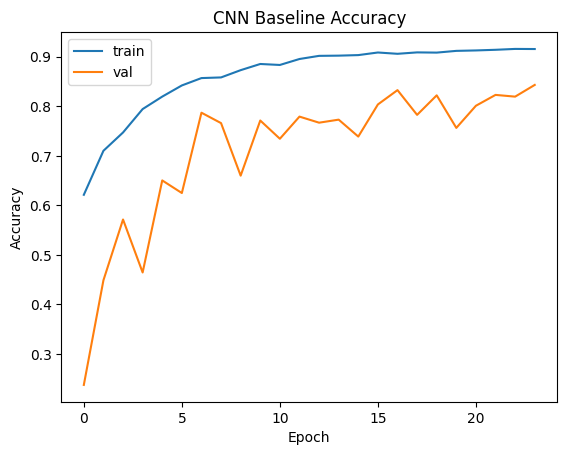

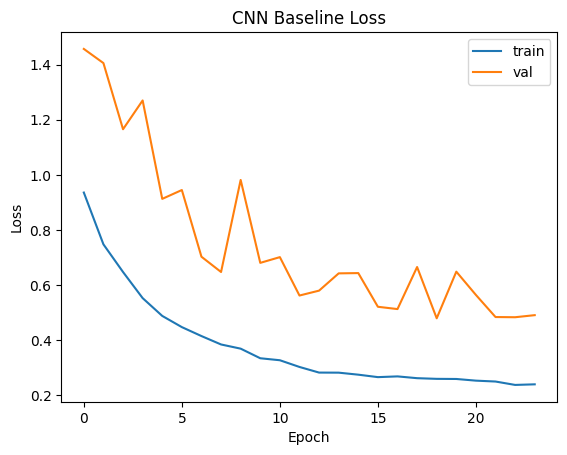

In [12]:
import matplotlib.pyplot as plt

def plot_history(history, title_prefix="Model"):
    h = history.history if hasattr(history, "history") else history

    acc = h.get("accuracy")
    val_acc = h.get("val_accuracy")
    loss = h.get("loss")
    val_loss = h.get("val_loss")

    # Plot Accuracy
    if acc is not None:
        plt.figure()
        plt.plot(acc, label="train")
        if val_acc is not None:
            plt.plot(val_acc, label="val")
        plt.xlabel("Epoch")
        plt.ylabel("Accuracy")
        plt.title(f"{title_prefix} Accuracy")
        plt.legend()
        plt.show()

    # Plot Loss
    if loss is not None:
        plt.figure()
        plt.plot(loss, label="train")
        if val_loss is not None:
            plt.plot(val_loss, label="val")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.title(f"{title_prefix} Loss")
        plt.legend()
        plt.show()

plot_history(history_cnn, "CNN Baseline")

In [13]:
test_loss_cnn, test_acc_cnn = cnn_baseline.evaluate(test_generator, verbose=0)
print(f"Test Loss     : {test_loss_cnn:.4f}")
print(f"Test Accuracy : {test_acc_cnn:.4f}")

Test Loss     : 0.3992
Test Accuracy : 0.8535


In [15]:
import numpy as np

y_prob_cnn = cnn_baseline.predict(test_generator, verbose=0)

y_pred_cnn = np.argmax(y_prob_cnn, axis=1)

y_true_cnn = test_generator.classes

class_names = list(test_generator.class_indices.keys())
print(class_names)

['glioma', 'meningioma', 'notumor', 'pituitary']


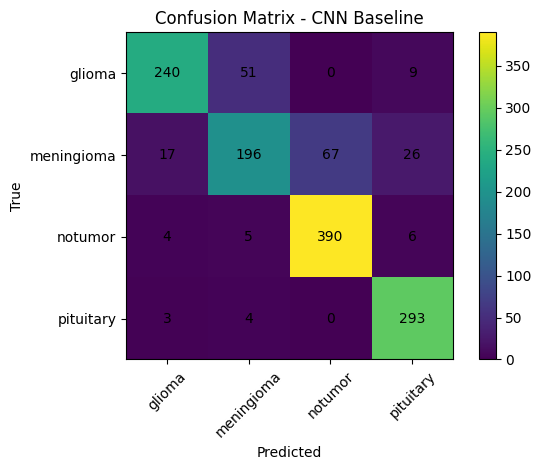

In [19]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm_cnn = confusion_matrix(y_true_cnn, y_pred_cnn)

plt.figure()
plt.imshow(cm_cnn)
plt.title("Confusion Matrix - CNN Baseline")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(range(len(class_names)), class_names, rotation=45)
plt.yticks(range(len(class_names)), class_names)

for i in range(len(class_names)):
    for j in range(len(class_names))
        plt.text(j, i, cm_cnn[i, j], ha="center", va="center")

plt.colorbar()
plt.tight_layout()
plt.show()


In [20]:
from sklearn.metrics import classification_report

report = classification_report(
    y_true_cnn,
    y_pred_cnn,
    target_names=class_names,
    digits=4
)

print("Classification Report - CNN Baseline")
print(report)

Classification Report - CNN Baseline
              precision    recall  f1-score   support

      glioma     0.9091    0.8000    0.8511       300
  meningioma     0.7656    0.6405    0.6975       306
     notumor     0.8534    0.9630    0.9049       405
   pituitary     0.8772    0.9767    0.9243       300

    accuracy                         0.8535      1311
   macro avg     0.8513    0.8450    0.8444      1311
weighted avg     0.8511    0.8535    0.8486      1311



In [13]:
cnn_baseline.save("cnn_baseline_non_aug.h5")

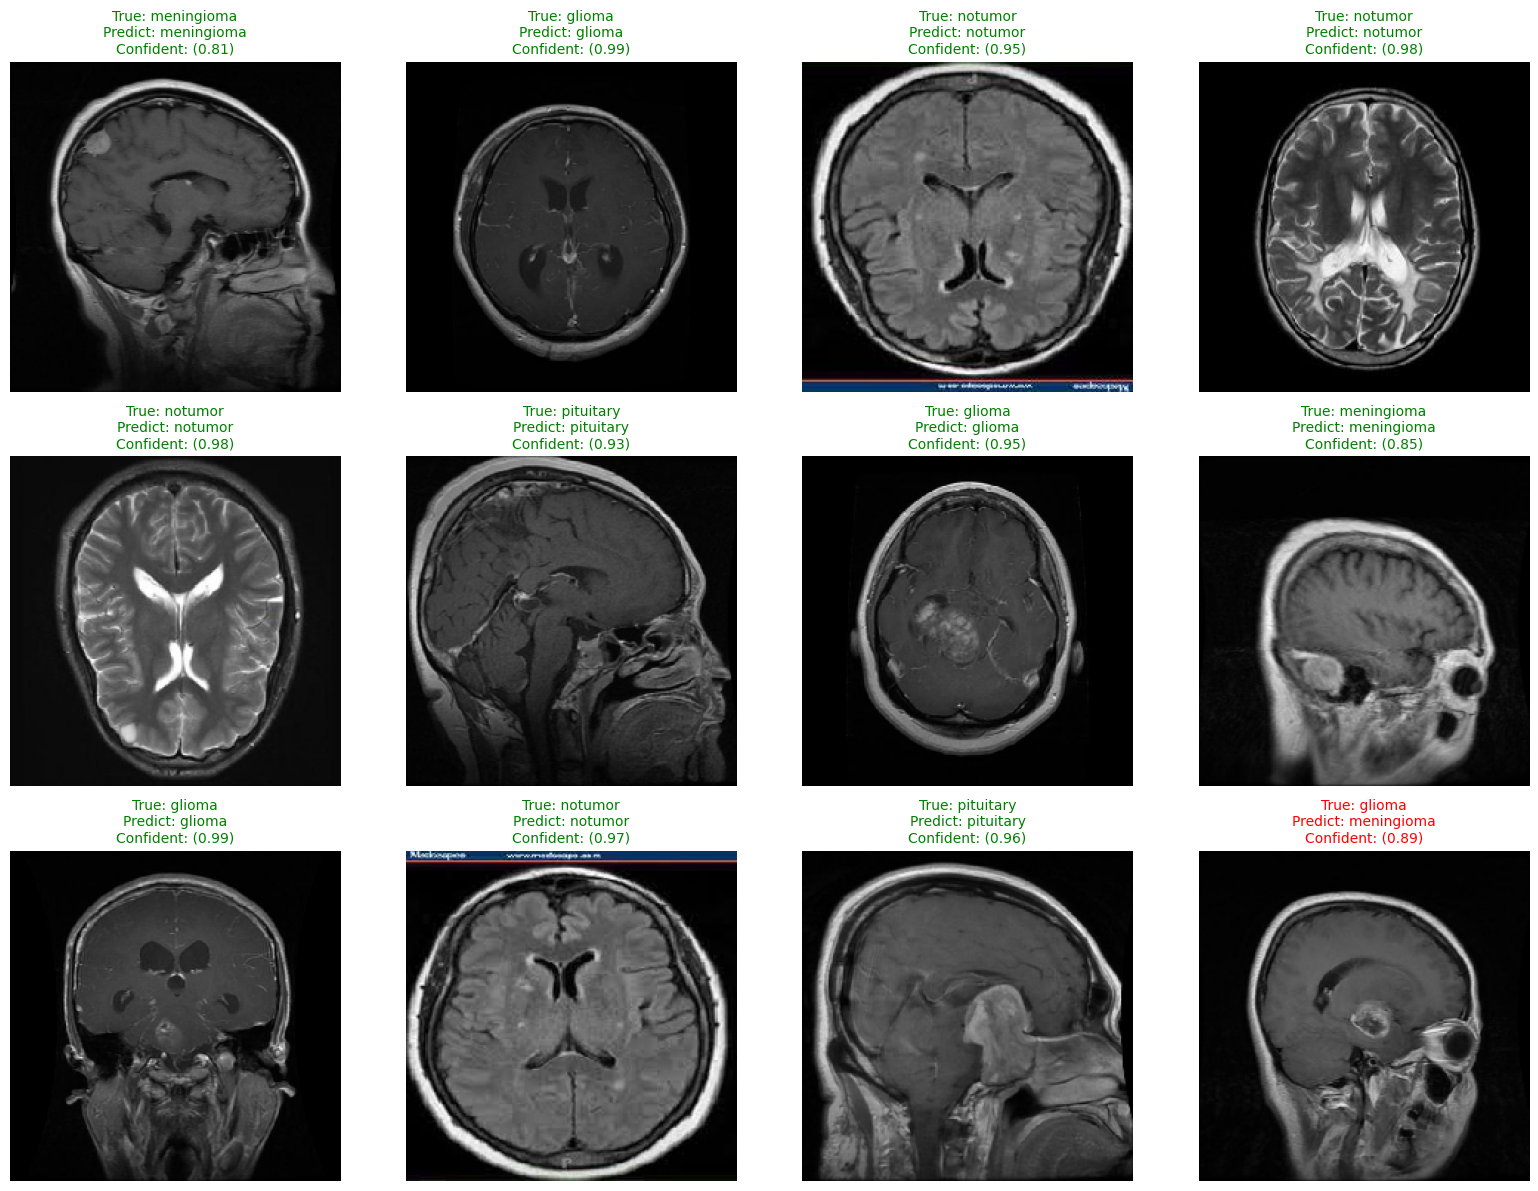

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def show_random_predictions(test_generator, y_true, y_pred, y_prob, class_names,
                            n=12, cols=4, seed=42):
    rng = np.random.default_rng(seed)
    idxs = rng.choice(len(y_true), size=min(n, len(y_true)), replace=False)

    rows = int(np.ceil(len(idxs) / cols))
    plt.figure(figsize=(4*cols, 4*rows))

    for k, idx in enumerate(idxs):
        fp = test_generator.filepaths[idx]

        img = tf.keras.utils.load_img(fp, target_size=test_generator.target_size)
        img_arr = tf.keras.utils.img_to_array(img) / 255.0

        true_label = class_names[y_true[idx]]
        pred_label = class_names[y_pred[idx]]
        conf = float(np.max(y_prob[idx]))

        plt.subplot(rows, cols, k+1)
        plt.imshow(img_arr.astype("float32"))
        plt.axis("off")
        plt.title(f"True: {true_label}\nPredict: {pred_label}\nConfident: ({conf:.2f})",
                  color=("green" if true_label == pred_label else "red"),
                  fontsize=10)

    plt.tight_layout()
    plt.show()

show_random_predictions(test_generator, y_true_cnn, y_pred_cnn, y_prob_cnn, class_names, n=12, cols=4)

## CNN + Augmentation

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D,
    BatchNormalization,
    GlobalAveragePooling2D,
    Dense, Dropout
)
from tensorflow.keras.optimizers import Adam

NUM_CLASSES = train_generator_aug.num_classes

cnn_baseline_aug = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(224,224,3)),
    BatchNormalization(),
    MaxPooling2D(),

    Conv2D(64, (3,3), activation="relu"),
    BatchNormalization(),
    MaxPooling2D(),

    Conv2D(128, (3,3), activation="relu"),
    BatchNormalization(),
    MaxPooling2D(),

    GlobalAveragePooling2D(),
    Dense(128, activation="relu"),
    Dropout(0.3),
    Dense(NUM_CLASSES, activation="softmax")
])

cnn_baseline_aug.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

cnn_baseline_aug.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,172 (434.27 KB)

 Trainable params: 110,724 (432.52 KB)

 Non-trainable params: 448 (1.75 KB)

In [27]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau

callbacks = [
    EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),
    ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.5,
        patience=3,
        min_lr=1e-6
    )
]

history_cnn_aug = cnn_baseline_aug.fit(
    train_generator_aug,
    epochs=50,
    validation_data=val_generator,
    callbacks=callbacks
)

Epoch 1/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 65s 411ms/step - accuracy: 0.4859 - loss: 1.1432 - val_accuracy: 0.3918 - val_loss: 1.5093 - learning_rate: 1.0000e-04
Epoch 2/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 57s 401ms/step - accuracy: 0.6334 - loss: 0.8989 - val_accuracy: 0.4356 - val_loss: 1.4991 - learning_rate: 1.0000e-04
Epoch 3/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 56s 394ms/step - accuracy: 0.6840 - loss: 0.8068 - val_accuracy: 0.4172 - val_loss: 1.3969 - learning_rate: 1.0000e-04
Epoch 4/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 58s 404ms/step - accuracy: 0.6994 - loss: 0.7397 - val_accuracy: 0.4680 - val_loss: 1.1601 - learning_rate: 1.0000e-04
Epoch 5/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 60s 419ms/step - accuracy: 0.7223 - loss: 0.7069 - val_accuracy: 0.6345 - val_loss: 0.9945 - learning_rate: 1.0000e-04
Epoch 6/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 59s 413ms/step - accuracy: 0.7342 - loss: 0.6621 - val_accuracy: 0.6214 - val_loss: 1.0038 - learning_rate: 1.0000e-04
Epoch 7/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 58s 40

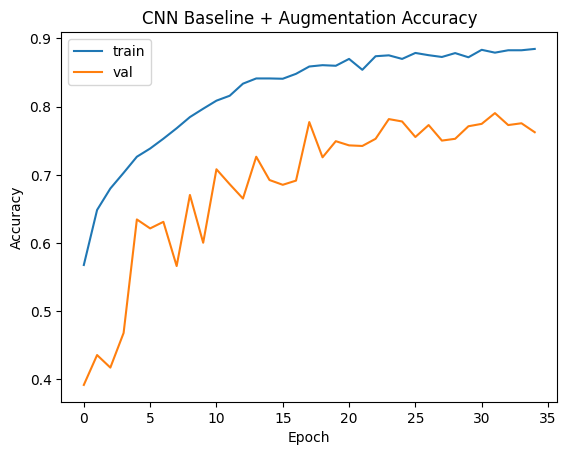

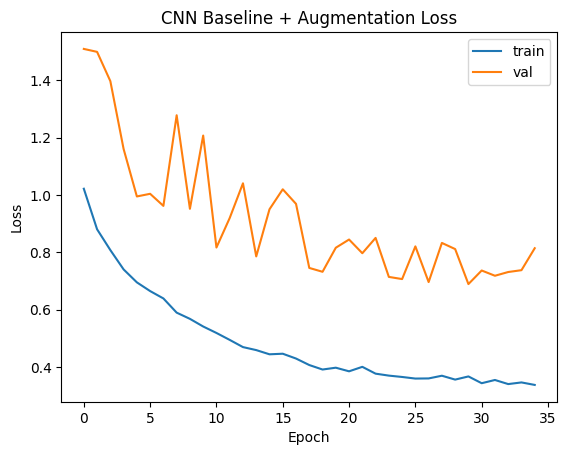

In [28]:
import matplotlib.pyplot as plt

def plot_history(history, title_prefix="Model"):
    h = history.history if hasattr(history, "history") else history

    acc = h.get("accuracy")
    val_acc = h.get("val_accuracy")
    loss = h.get("loss")
    val_loss = h.get("val_loss")

    # Plot Accuracy
    if acc is not None:
        plt.figure()
        plt.plot(acc, label="train")
        if val_acc is not None:
            plt.plot(val_acc, label="val")
        plt.xlabel("Epoch")
        plt.ylabel("Accuracy")
        plt.title(f"{title_prefix} Accuracy")
        plt.legend()
        plt.show()

    # Plot Loss
    if loss is not None:
        plt.figure()
        plt.plot(loss, label="train")
        if val_loss is not None:
            plt.plot(val_loss, label="val")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.title(f"{title_prefix} Loss")
        plt.legend()
        plt.show()

plot_history(history_cnn_aug, "CNN Baseline + Augmentation")

In [48]:
test_loss_cnn_aug, test_acc_cnn_aug = cnn_baseline_aug.evaluate(test_generator, verbose=0)
print(f"Test Loss     : {test_loss_cnn_aug:.4f}")
print(f"Test Accuracy : {test_acc_cnn_aug:.4f}")

Test Loss     : 9277.7676
Test Accuracy : 0.2517


In [49]:
import numpy as np

y_prob_cnn_aug = cnn_baseline_aug.predict(test_generator, verbose=0)

y_pred_cnn_aug = np.argmax(y_prob_cnn_aug, axis=1)

y_true_cnn_aug = test_generator.classes

class_names = list(test_generator.class_indices.keys())
print(class_names)

['glioma', 'meningioma', 'notumor', 'pituitary']


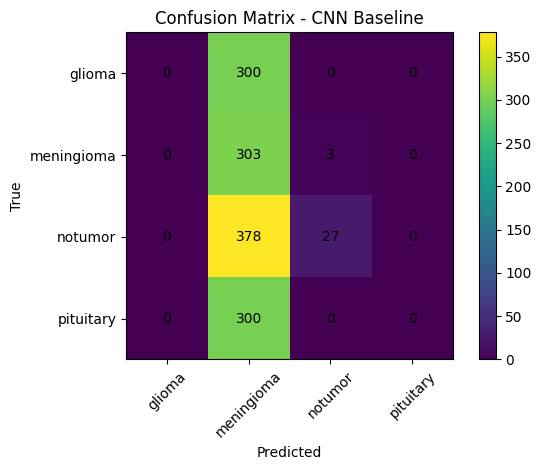

In [50]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm_cnn_aug = confusion_matrix(y_true_cnn_aug, y_pred_cnn_aug)

plt.figure()
plt.imshow(cm_cnn_aug)
plt.title("Confusion Matrix - CNN Baseline")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(range(len(class_names)), class_names, rotation=45)
plt.yticks(range(len(class_names)), class_names)

for i in range(len(class_names)):
    for j in range(len(class_names)):
        plt.text(j, i, cm_cnn_aug[i, j], ha="center", va="center")

plt.colorbar()
plt.tight_layout()
plt.show()


In [51]:
from sklearn.metrics import classification_report

report = classification_report(
    y_true_cnn,
    y_pred_cnn,
    target_names=class_names,
    digits=4
)

print("Classification Report - CNN + Augmentation")
print(report)

Classification Report - CNN + Augmentation
              precision    recall  f1-score   support

      glioma     0.9091    0.8000    0.8511       300
  meningioma     0.7656    0.6405    0.6975       306
     notumor     0.8534    0.9630    0.9049       405
   pituitary     0.8772    0.9767    0.9243       300

    accuracy                         0.8535      1311
   macro avg     0.8513    0.8450    0.8444      1311
weighted avg     0.8511    0.8535    0.8486      1311



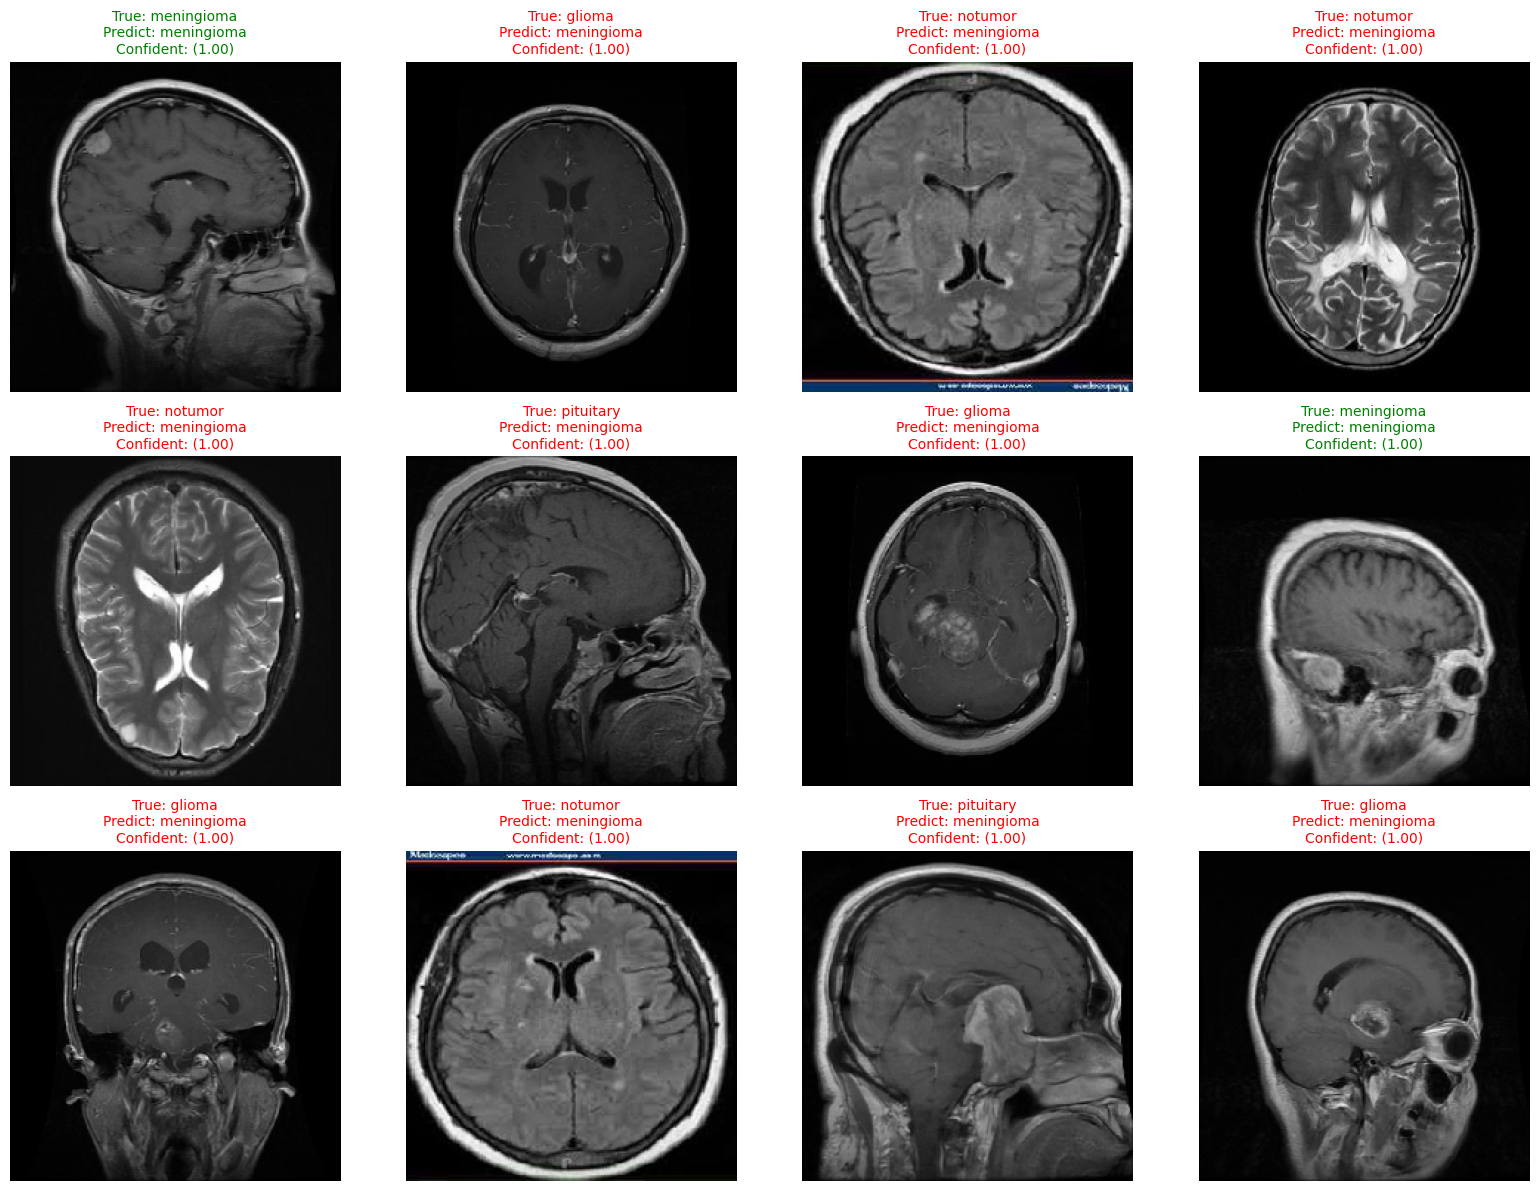

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def show_random_predictions(test_generator, y_true, y_pred, y_prob, class_names,
                            n=12, cols=4, seed=42):
    rng = np.random.default_rng(seed)
    idxs = rng.choice(len(y_true), size=min(n, len(y_true)), replace=False)

    rows = int(np.ceil(len(idxs) / cols))
    plt.figure(figsize=(4*cols, 4*rows))

    for k, idx in enumerate(idxs):
        fp = test_generator.filepaths[idx]

        img = tf.keras.utils.load_img(fp, target_size=test_generator.target_size)
        img_arr = tf.keras.utils.img_to_array(img) / 255.0

        true_label = class_names[y_true[idx]]
        pred_label = class_names[y_pred[idx]]
        conf = float(np.max(y_prob[idx]))

        plt.subplot(rows, cols, k+1)
        plt.imshow(img_arr.astype("float32"))
        plt.axis("off")
        plt.title(f"True: {true_label}\nPredict: {pred_label}\nConfident: ({conf:.2f})",
                  color=("green" if true_label == pred_label else "red"),
                  fontsize=10)

    plt.tight_layout()
    plt.show()

show_random_predictions(test_generator, y_true_cnn_aug, y_pred_cnn_aug, y_prob_cnn_aug, class_names, n=12, cols=4)

## VGG16 + Augmentation

In [55]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model

base_model = VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(224, 224, 3)
)

base_model.trainable = False 

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
output = Dense(4, activation="softmax")(x)

vgg_model_aug = Model(inputs=base_model.input, outputs=output)

vgg_model_aug.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

vgg_model_aug.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,044 (56.64 MB)

 Trainable params: 132,356 (517.02 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [56]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau

callbacks = [
    EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),
    ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.5,
        patience=3,
        min_lr=1e-6
    )
]

history_vgg_aug = vgg_model_aug.fit(
    train_generator_vgg_aug,
    epochs=50,
    validation_data=val_generator_vgg,
    callbacks=callbacks
)

Epoch 1/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 65s 436ms/step - accuracy: 0.4142 - loss: 3.0565 - val_accuracy: 0.6494 - val_loss: 1.3357 - learning_rate: 1.0000e-04
Epoch 2/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 57s 398ms/step - accuracy: 0.6907 - loss: 1.0301 - val_accuracy: 0.7125 - val_loss: 1.0667 - learning_rate: 1.0000e-04
Epoch 3/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 56s 394ms/step - accuracy: 0.7663 - loss: 0.7153 - val_accuracy: 0.7292 - val_loss: 0.9972 - learning_rate: 1.0000e-04
Epoch 4/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 54s 380ms/step - accuracy: 0.8019 - loss: 0.5846 - val_accuracy: 0.7537 - val_loss: 0.7981 - learning_rate: 1.0000e-04
Epoch 5/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 54s 378ms/step - accuracy: 0.8255 - loss: 0.4789 - val_accuracy: 0.7581 - val_loss: 0.7516 - learning_rate: 1.0000e-04
Epoch 6/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 55s 383ms/step - accuracy: 0.8464 - loss: 0.4029 - val_accuracy: 0.7739 - val_loss: 0.6893 - learning_rate: 1.0000e-04
Epoch 7/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 54s 37

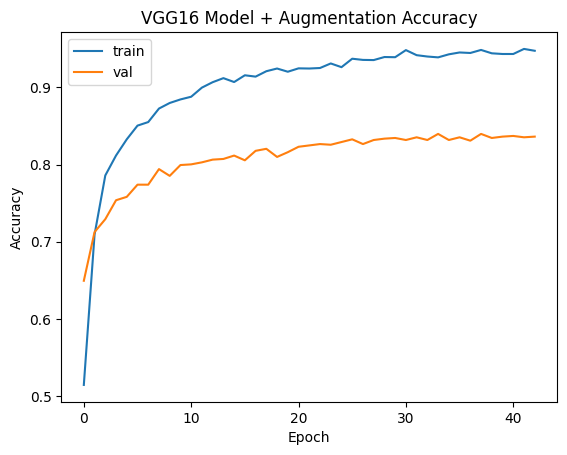

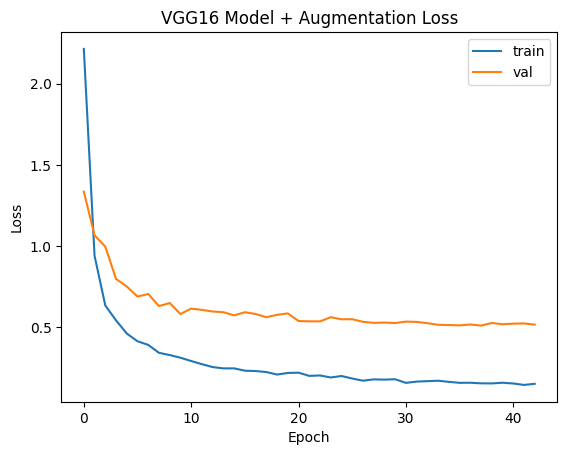

In [57]:
import matplotlib.pyplot as plt

def plot_history(history, title_prefix="Model"):
    h = history.history if hasattr(history, "history") else history

    acc = h.get("accuracy")
    val_acc = h.get("val_accuracy")
    loss = h.get("loss")
    val_loss = h.get("val_loss")

    # Plot Accuracy
    if acc is not None:
        plt.figure()
        plt.plot(acc, label="train")
        if val_acc is not None:
            plt.plot(val_acc, label="val")
        plt.xlabel("Epoch")
        plt.ylabel("Accuracy")
        plt.title(f"{title_prefix} Accuracy")
        plt.legend()
        plt.show()

    # Plot Loss
    if loss is not None:
        plt.figure()
        plt.plot(loss, label="train")
        if val_loss is not None:
            plt.plot(val_loss, label="val")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.title(f"{title_prefix} Loss")
        plt.legend()
        plt.show()

plot_history(history_vgg_aug, "VGG16 Model + Augmentation")

In [58]:
test_loss_vgg_aug, test_acc_vgg_aug = vgg_model_aug.evaluate(test_generator_vgg, verbose=0)

print(f"Test Loss     : {test_loss_vgg_aug:.4f}")
print(f"Test Accuracy : {test_acc_vgg_aug:.4f}")

Test Loss     : 0.3272
Test Accuracy : 0.8879


In [59]:
import numpy as np

y_prob_vgg_aug = vgg_model_aug.predict(test_generator_vgg, verbose=0)

y_pred_vgg_aug = np.argmax(y_prob_vgg_aug, axis=1)

y_true_vgg_aug = test_generator_vgg.classes

class_names = list(test_generator_vgg.class_indices.keys())
print(class_names)

['glioma', 'meningioma', 'notumor', 'pituitary']


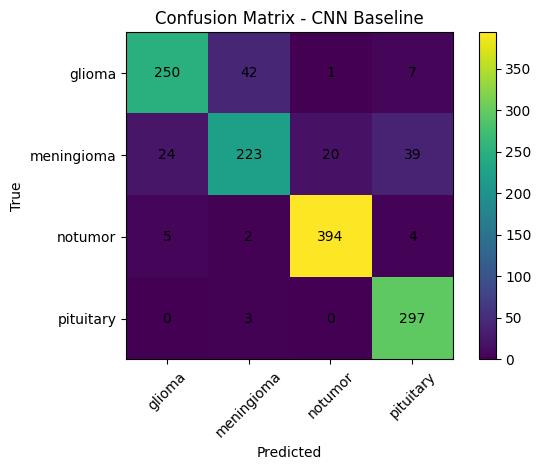

In [60]:

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm_vgg_aug = confusion_matrix(y_true_vgg_aug, y_pred_vgg_aug)

plt.figure()
plt.imshow(cm_vgg_aug)
plt.title("Confusion Matrix - CNN Baseline")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(range(len(class_names)), class_names, rotation=45)
plt.yticks(range(len(class_names)), class_names)

for i in range(len(class_names)):
    for j in range(len(class_names)):
        plt.text(j, i, cm_vgg_aug[i, j], ha="center", va="center")

plt.colorbar()
plt.tight_layout()
plt.show()

In [62]:
from sklearn.metrics import classification_report

report = classification_report(
    y_true_cnn_aug,
    y_pred_cnn_aug,
    target_names=class_names,
    digits=4
)

print("Classification Report - VGG16 + Augmentation")
print(report)

Classification Report - VGG16 + Augmentation
              precision    recall  f1-score   support

      glioma     0.0000    0.0000    0.0000       300
  meningioma     0.2365    0.9902    0.3819       306
     notumor     0.9000    0.0667    0.1241       405
   pituitary     0.0000    0.0000    0.0000       300

    accuracy                         0.2517      1311
   macro avg     0.2841    0.2642    0.1265      1311
weighted avg     0.3332    0.2517    0.1275      1311



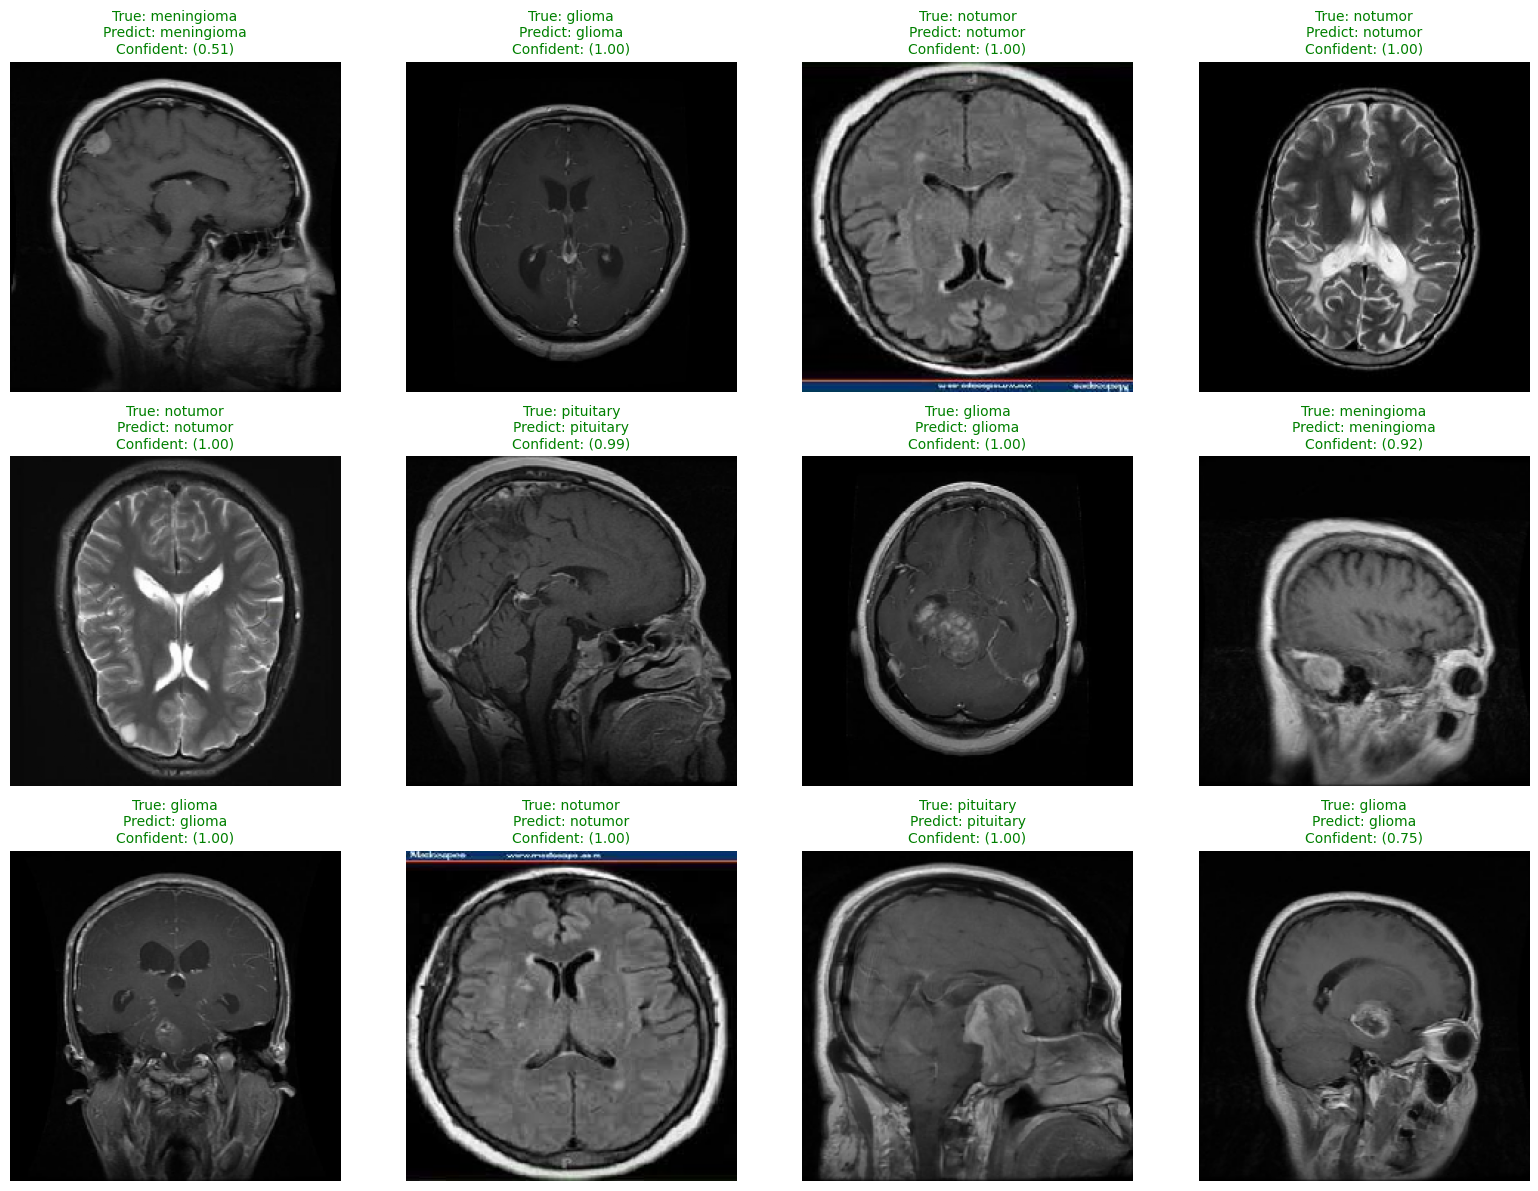

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def show_random_predictions(test_generator, y_true, y_pred, y_prob, class_names,
                            n=12, cols=4, seed=42):
    rng = np.random.default_rng(seed)
    idxs = rng.choice(len(y_true), size=min(n, len(y_true)), replace=False)

    rows = int(np.ceil(len(idxs) / cols))
    plt.figure(figsize=(4*cols, 4*rows))

    for k, idx in enumerate(idxs):
        fp = test_generator.filepaths[idx]

        img = tf.keras.utils.load_img(fp, target_size=test_generator.target_size)
        img_arr = tf.keras.utils.img_to_array(img) / 255.0

        true_label = class_names[y_true[idx]]
        pred_label = class_names[y_pred[idx]]
        conf = float(np.max(y_prob[idx]))

        plt.subplot(rows, cols, k+1)
        plt.imshow(img_arr.astype("float32"))
        plt.axis("off")
        plt.title(f"True: {true_label}\nPredict: {pred_label}\nConfident: ({conf:.2f})",
                  color=("green" if true_label == pred_label else "red"),
                  fontsize=10)

    plt.tight_layout()
    plt.show()

show_random_predictions(test_generator, y_true_vgg_aug, y_pred_vgg_aug, y_prob_vgg_aug, class_names, n=12, cols=4)

## VGG16

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 42

train_dir = TRAIN
test_dir  = TEST

# ===== TRAIN + VAL (VGG16 PREPROCESS, NO AUGMENT) =====
trainval_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2
)

train_generator = trainval_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training",
    shuffle=True,
    seed=SEED
)

val_generator = trainval_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation",
    shuffle=False,
    seed=SEED
)

# ===== TEST (VGG16 PREPROCESS, NO AUGMENT) =====
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)


Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [39]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

NUM_CLASSES = train_generator.num_classes

base_model = VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(224,224,3)
)

base_model.trainable = False  # PENTING

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
output = Dense(NUM_CLASSES, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,044 (56.64 MB)

 Trainable params: 132,356 (517.02 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [41]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

callbacks = [
    EarlyStopping(
        monitor="val_loss",
        patience=5,
        restore_best_weights=True
    ),
    ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.5,
        patience=3,
        min_lr=1e-6
    )
]


history_stage1 = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    callbacks=callbacks
)


Epoch 1/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 25s 148ms/step - accuracy: 0.4295 - loss: 3.2694 - val_accuracy: 0.6065 - val_loss: 1.2635 - learning_rate: 1.0000e-04
Epoch 2/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 19s 134ms/step - accuracy: 0.6715 - loss: 1.1217 - val_accuracy: 0.6854 - val_loss: 1.0378 - learning_rate: 1.0000e-04
Epoch 3/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 19s 132ms/step - accuracy: 0.7597 - loss: 0.7139 - val_accuracy: 0.7178 - val_loss: 0.8703 - learning_rate: 1.0000e-04
Epoch 4/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 18s 128ms/step - accuracy: 0.8036 - loss: 0.5552 - val_accuracy: 0.7309 - val_loss: 0.8429 - learning_rate: 1.0000e-04
Epoch 5/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 19s 131ms/step - accuracy: 0.8242 - loss: 0.4725 - val_accuracy: 0.7572 - val_loss: 0.7259 - learning_rate: 1.0000e-04
Epoch 6/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 19s 136ms/step - accuracy: 0.8493 - loss: 0.4056 - val_accuracy: 0.7791 - val_loss: 0.6554 - learning_rate: 1.0000e-04
Epoch 7/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 18s 12

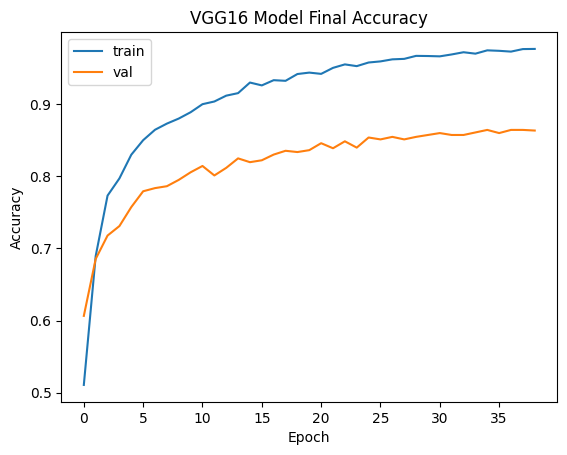

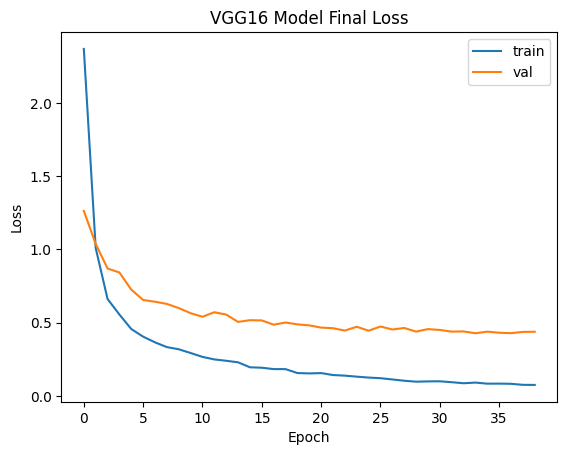

In [42]:
import matplotlib.pyplot as plt

def plot_history(history, title_prefix="Model"):
    h = history.history if hasattr(history, "history") else history

    acc = h.get("accuracy")
    val_acc = h.get("val_accuracy")
    loss = h.get("loss")
    val_loss = h.get("val_loss")

    # Plot Accuracy
    if acc is not None:
        plt.figure()
        plt.plot(acc, label="train")
        if val_acc is not None:
            plt.plot(val_acc, label="val")
        plt.xlabel("Epoch")
        plt.ylabel("Accuracy")
        plt.title(f"{title_prefix} Accuracy")
        plt.legend()
        plt.show()

    # Plot Loss
    if loss is not None:
        plt.figure()
        plt.plot(loss, label="train")
        if val_loss is not None:
            plt.plot(val_loss, label="val")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.title(f"{title_prefix} Loss")
        plt.legend()
        plt.show()


plot_history(history_stage1, "VGG16 Model")

In [43]:
test_loss, test_acc = model.evaluate(test_generator_vgg, verbose=0)

print(f"Test Loss     : {test_loss:.4f}")
print(f"Test Accuracy : {test_acc:.4f}")

Test Loss     : 0.2499
Test Accuracy : 0.9123


In [44]:
import numpy as np

y_prob = model.predict(test_generator_vgg, verbose=0)

y_pred = np.argmax(y_prob, axis=1)

y_true = test_generator_vgg.classes

class_names = list(test_generator_vgg.class_indices.keys())
print(class_names)

['glioma', 'meningioma', 'notumor', 'pituitary']


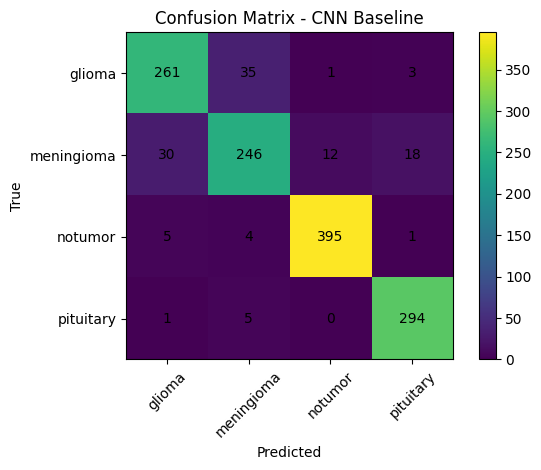

In [45]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)

plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix - CNN Baseline")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(range(len(class_names)), class_names, rotation=45)
plt.yticks(range(len(class_names)), class_names)

for i in range(len(class_names)):
    for j in range(len(class_names)):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.colorbar()
plt.tight_layout()
plt.show()


In [46]:
from sklearn.metrics import classification_report

report = classification_report(
    y_true,
    y_pred,
    target_names=class_names,
    digits=4
)

print("Classification Report - VGG16 Model Stage 1")
print(report)

Classification Report - VGG16 Model Stage 1
              precision    recall  f1-score   support

      glioma     0.8788    0.8700    0.8744       300
  meningioma     0.8483    0.8039    0.8255       306
     notumor     0.9681    0.9753    0.9717       405
   pituitary     0.9304    0.9800    0.9545       300

    accuracy                         0.9123      1311
   macro avg     0.9064    0.9073    0.9065      1311
weighted avg     0.9111    0.9123    0.9114      1311



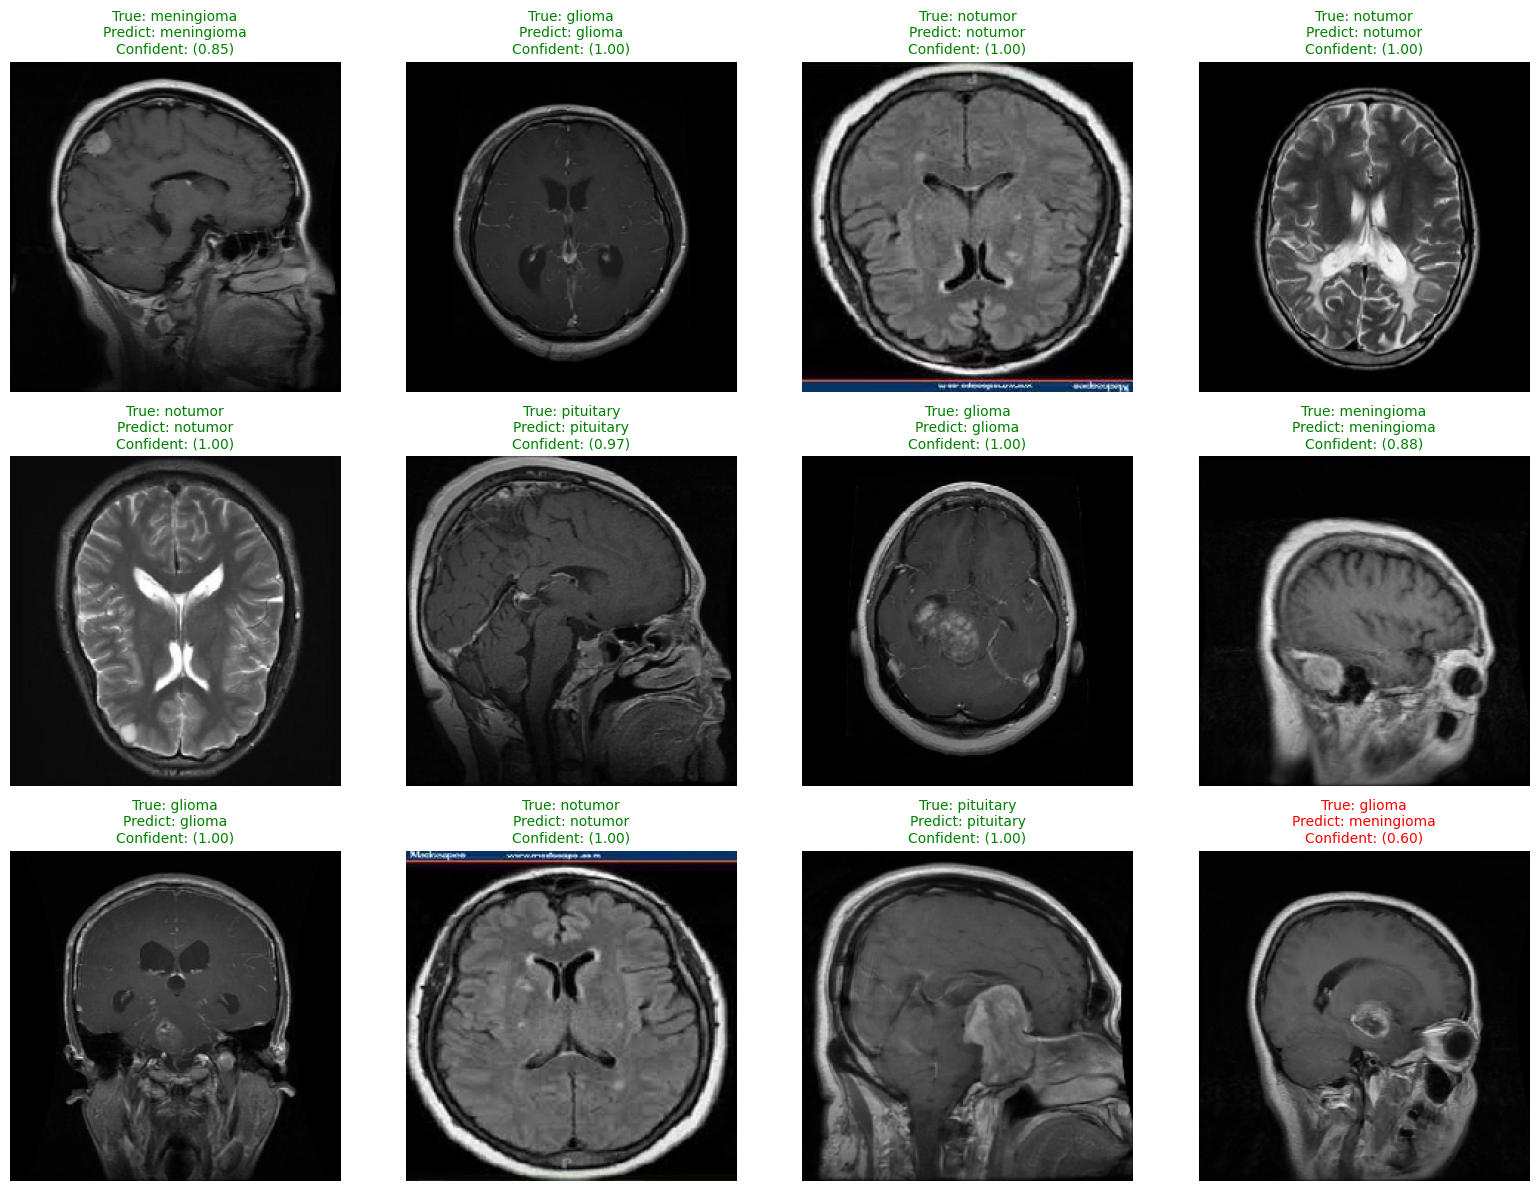

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def show_random_predictions(test_generator, y_true, y_pred, y_prob, class_names,
                            n=12, cols=4, seed=42):
    rng = np.random.default_rng(seed)
    idxs = rng.choice(len(y_true), size=min(n, len(y_true)), replace=False)

    rows = int(np.ceil(len(idxs) / cols))
    plt.figure(figsize=(4*cols, 4*rows))

    for k, idx in enumerate(idxs):
        fp = test_generator.filepaths[idx]

        img = tf.keras.utils.load_img(fp, target_size=test_generator.target_size)
        img_arr = tf.keras.utils.img_to_array(img) / 255.0

        true_label = class_names[y_true[idx]]
        pred_label = class_names[y_pred[idx]]
        conf = float(np.max(y_prob[idx]))

        plt.subplot(rows, cols, k+1)
        plt.imshow(img_arr.astype("float32"))
        plt.axis("off")
        plt.title(f"True: {true_label}\nPredict: {pred_label}\nConfident: ({conf:.2f})",
                  color=("green" if true_label == pred_label else "red"),
                  fontsize=10)

    plt.tight_layout()
    plt.show()

show_random_predictions(test_generator, y_true, y_pred, y_prob, class_names, n=12, cols=4)